In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("historical_automobile_sales.csv")

df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [20]:
df.describe()


,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [21]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

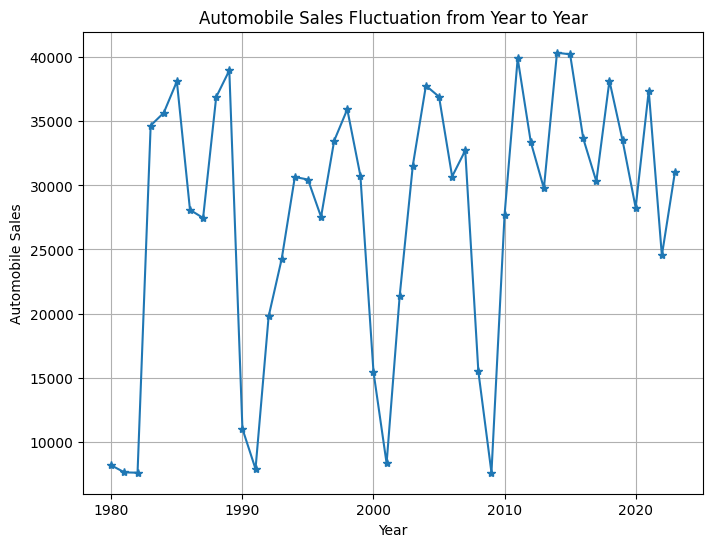

In [22]:
# Remove outliers (assuming outliers are defined as values beyond 1.5 IQR)
Q1 = df['Automobile_Sales'].quantile(0.25)
Q3 = df['Automobile_Sales'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = df[~((df['Automobile_Sales'] < (Q1 - 1.5 * IQR)) | (df['Automobile_Sales'] > (Q3 + 1.5 * IQR)))]

# Group by year and sum the sales
yearly_sales = filtered_data.groupby('Year')['Automobile_Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(8, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Automobile_Sales'], marker='*')
plt.title('Automobile Sales Fluctuation from Year to Year')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

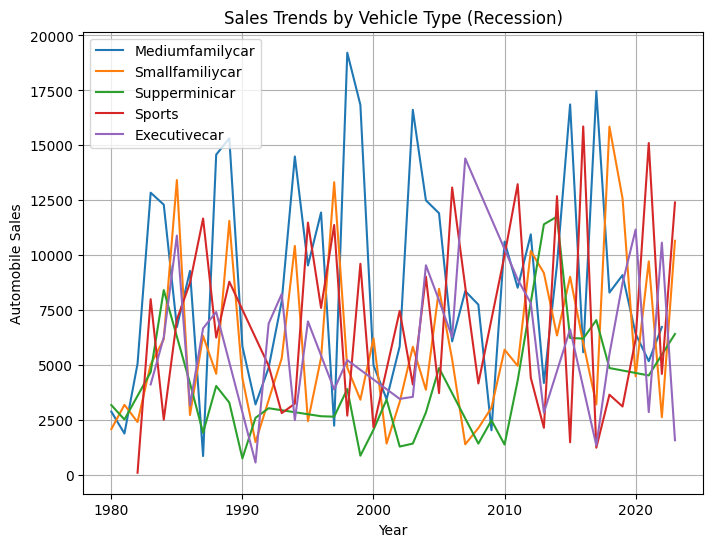

In [23]:
# Group by year and vehicle type, then sum the sales
vehicle_type_sales = filtered_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(8, 6))
for vehicle_type in vehicle_type_sales['Vehicle_Type'].unique():
    subset = vehicle_type_sales[vehicle_type_sales['Vehicle_Type'] == vehicle_type]
    plt.plot(subset['Year'], subset['Automobile_Sales'], label=vehicle_type)

plt.title('Sales Trends by Vehicle Type (Recession)')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend()
plt.grid(True)
plt.show()


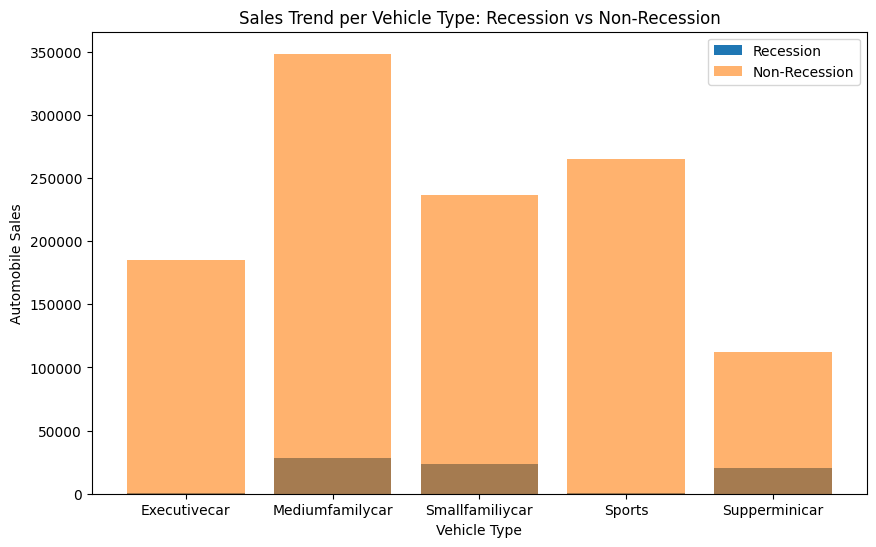

In [24]:
# Separate data into recession and non-recession periods
recession_data = filtered_data[filtered_data['Recession'] == 1]
non_recession_data = filtered_data[filtered_data['Recession'] == 0]

# Group by vehicle type and sum the sales
recession_sales = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
non_recession_sales = non_recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(recession_sales['Vehicle_Type'], recession_sales['Automobile_Sales'], label='Recession')
plt.bar(non_recession_sales['Vehicle_Type'], non_recession_sales['Automobile_Sales'], label='Non-Recession', alpha=0.6)

plt.title('Sales Trend per Vehicle Type: Recession vs Non-Recession')
plt.xlabel('Vehicle Type')
plt.ylabel('Automobile Sales')
plt.legend()
plt.show()


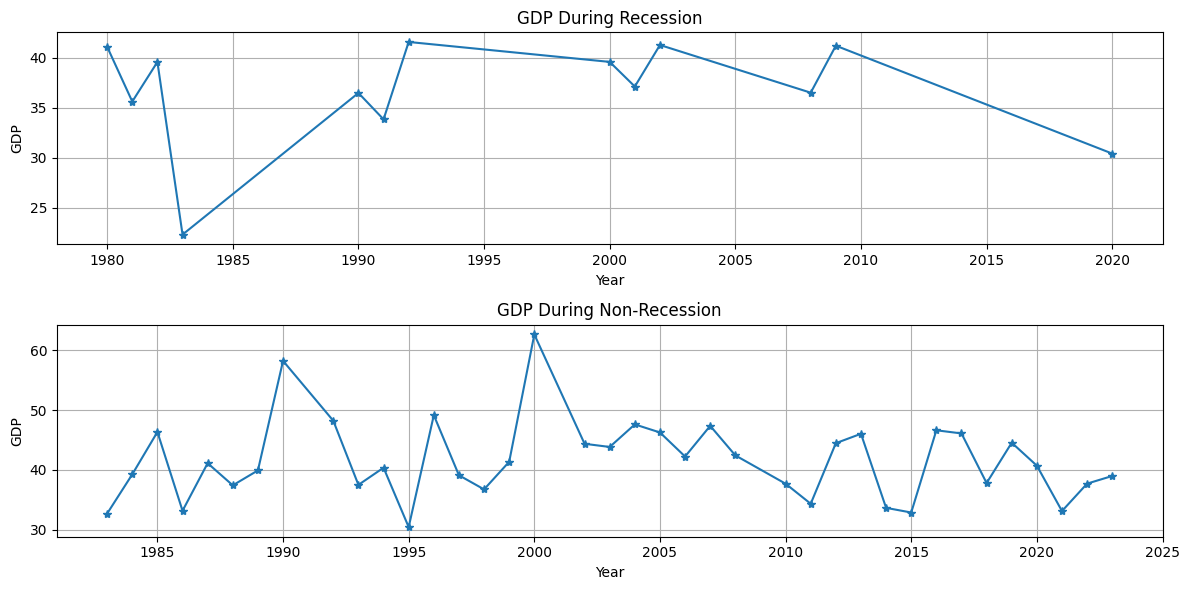

In [25]:
# Group by year and calculate mean GDP
recession_gdp = recession_data.groupby('Year')['GDP'].mean().reset_index()
non_recession_gdp = non_recession_data.groupby('Year')['GDP'].mean().reset_index()

# Plot the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

axes[0].plot(recession_gdp['Year'], recession_gdp['GDP'], marker='*')
axes[0].set_title('GDP During Recession')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')
axes[0].grid(True)

axes[1].plot(non_recession_gdp['Year'], non_recession_gdp['GDP'], marker='*')
axes[1].set_title('GDP During Non-Recession')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')
axes[1].grid(True)

plt.tight_layout()
plt.show()


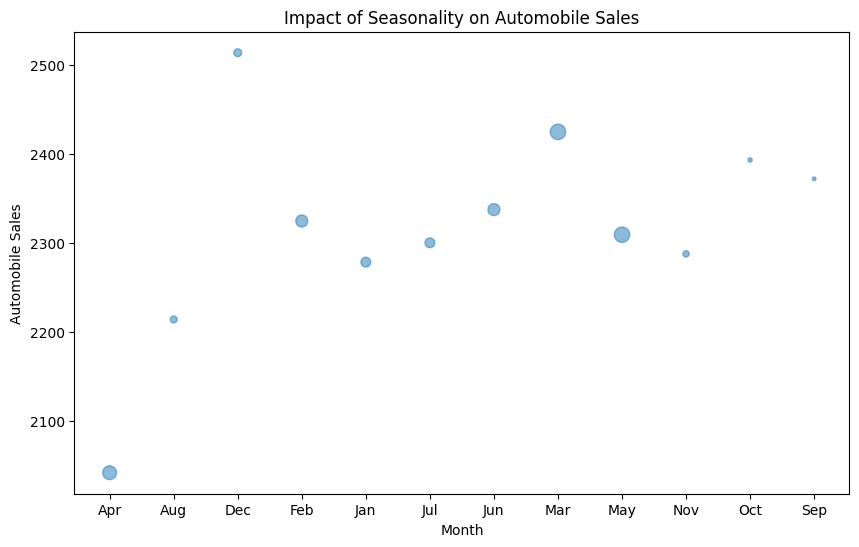

In [26]:
# Group by month and calculate mean seasonality weight and sales
seasonality_data = filtered_data.groupby('Month').agg({'Seasonality_Weight': 'mean', 'Automobile_Sales': 'mean'}).reset_index()

# Plot the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(seasonality_data['Month'], seasonality_data['Automobile_Sales'], s=seasonality_data['Seasonality_Weight']*100, alpha=0.5)

plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.show()


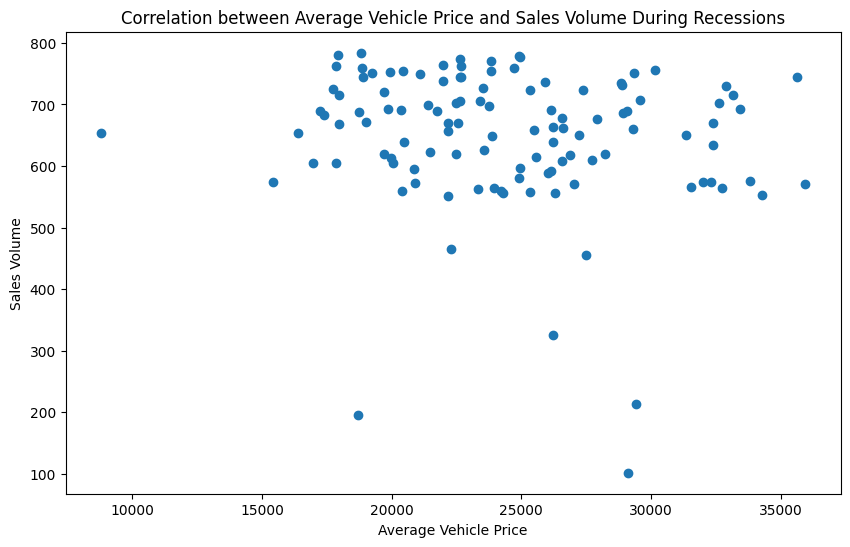

In [27]:
# Filter data for recession periods
recession_data = filtered_data[filtered_data['Recession'] == 1]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'])

plt.title('Correlation between Average Vehicle Price and Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.show()


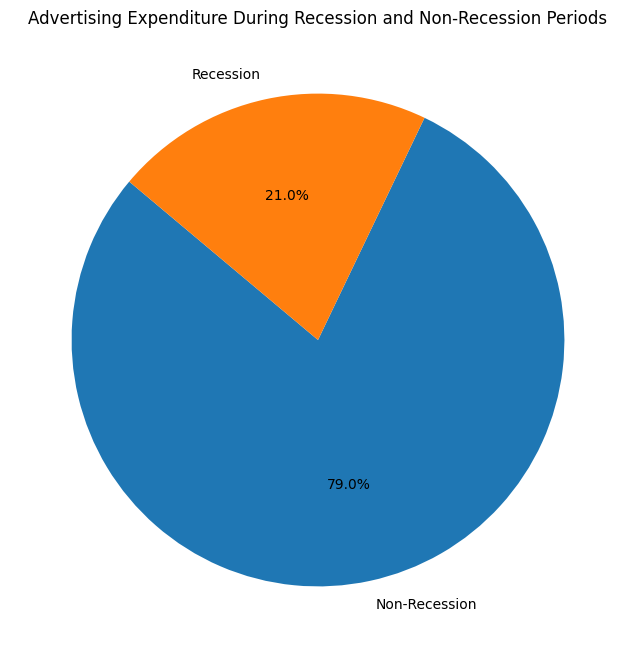

In [28]:
# Group by recession and sum the advertising expenditure
ad_expenditure = filtered_data.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure['Advertising_Expenditure'], labels=['Non-Recession', 'Recession'], autopct='%1.1f%%', startangle=140)

plt.title('Advertising Expenditure During Recession and Non-Recession Periods')
plt.show()


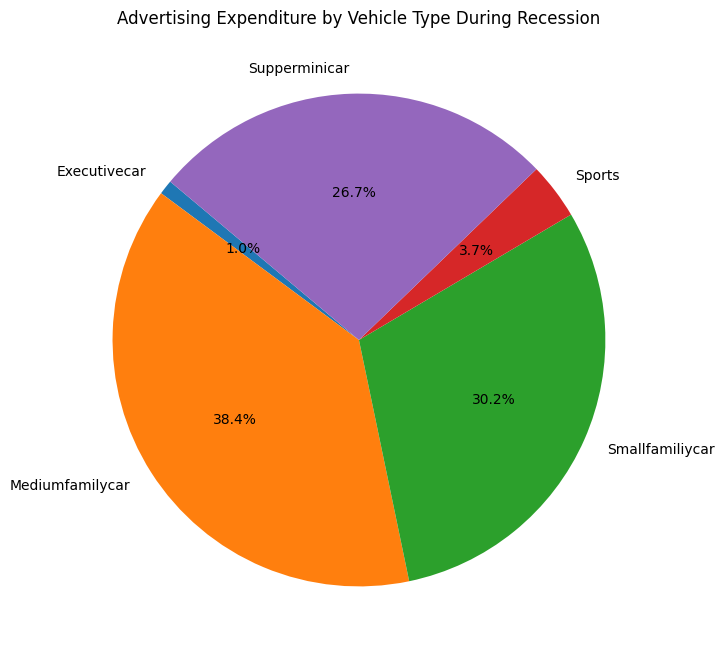

In [29]:
# Filter data for recession periods
recession_data = filtered_data[filtered_data['Recession'] == 1]

# Group by vehicle type and sum the advertising expenditure
ad_expenditure_vehicle = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(ad_expenditure_vehicle['Advertising_Expenditure'], labels=ad_expenditure_vehicle['Vehicle_Type'], autopct='%1.1f%%', startangle=140)

plt.title('Advertising Expenditure by Vehicle Type During Recession')
plt.show()


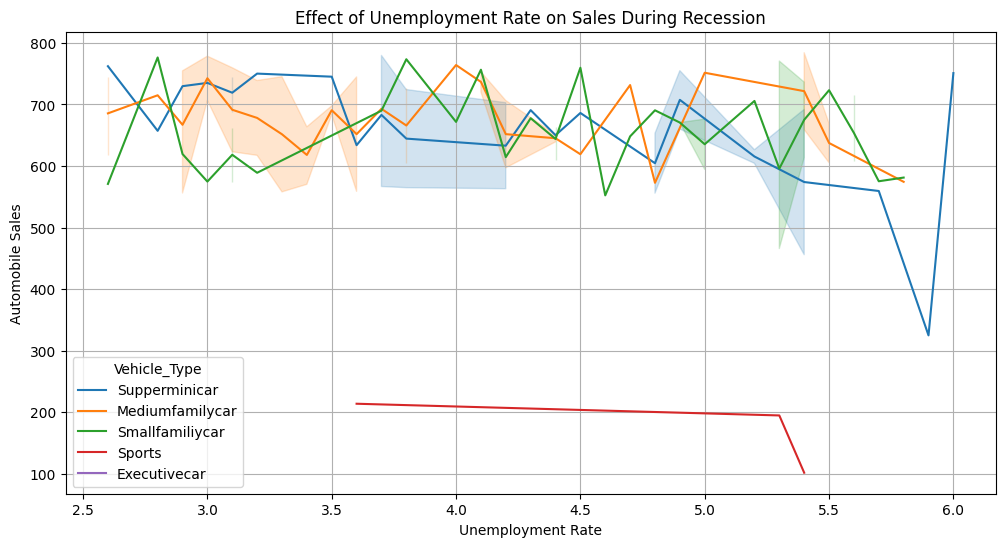

In [30]:

# TASK 1.9: Line plot (Unemployment rate impact on sales during recession)
plt.figure(figsize=(12, 6))
recession_data = df[df['Recession'] == 1]
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Effect of Unemployment Rate on Sales During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


In [31]:
pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [32]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv("historical_automobile_sales.csv")

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Automobile Sales Analysis Dashboard"

# App layout
app.layout = html.Div([
    html.H1("Automobile Sales Analysis Dashboard", style={"textAlign": "center"}),

    # Dropdowns for filtering
    html.Div([
        html.Label("Select a Report Type:"),
        dcc.Dropdown(
            id="report-type-dropdown",
            options=[
                {"label": "Recession Report", "value": "Recession"},
                {"label": "Yearly Report", "value": "Yearly"}
            ],
            value="Recession",
            placeholder="Select a report type"
        ),

        html.Label("Select a Year:"),
        dcc.Dropdown(
            id="year-dropdown",
            options=[{"label": year, "value": year} for year in sorted(data["Year"].unique())],
            value=data["Year"].min(),
            placeholder="Select a year"
        )
    ], style={"width": "50%", "margin": "auto"}),

    # Output container
    html.Div(id="output-container", className="output-container"),

    # Graph display area
    html.Div([
        dcc.Graph(id="report-graph")
    ])
])

# Callback to update output and graph
@app.callback(
    [Output("output-container", "children"),
     Output("report-graph", "figure")],
    [Input("report-type-dropdown", "value"),
     Input("year-dropdown", "value")]
)
def update_report(report_type, selected_year):
    if report_type == "Recession":
        filtered_data = data[data["Recession"] == 1]  # Filter for recession years
        title = f"Recession Report Statistics for {selected_year}"
        figure = px.bar(
            filtered_data[filtered_data["Year"] == selected_year],
            x="Month",
            y="Automobile_Sales",
            title=title
        )
    else:  # Yearly Report
        filtered_data = data[data["Year"] == selected_year]
        title = f"Yearly Report Statistics for {selected_year}"
        figure = px.line(
            filtered_data,
            x="Month",
            y="Automobile_Sales",
            title=title
        )

    return f"Displaying {report_type} Report for {selected_year}", figure

# Run the app
if __name__ == "__main__":
    app.run_server(debug=True)


<IPython.core.display.Javascript object>